## Hypothesis tests and z-scores

Hypothesis testing use case:

***Determine whether sample statistics are close to or far away from expected (of hypothesized) values***

In [1]:
import pandas as pd

stack_overflow = pd.read_feather('./data/stack_overflow.feather')
print(stack_overflow.info())
mean_comp_samp = stack_overflow['converted_comp'].mean()  # point estimate of compensation
print(mean_comp_samp)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2261 entries, 0 to 2260
Data columns (total 63 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   respondent                         2261 non-null   float64 
 1   main_branch                        2261 non-null   object  
 2   hobbyist                           2261 non-null   object  
 3   age                                2261 non-null   float64 
 4   age_1st_code                       2261 non-null   float64 
 5   age_first_code_cut                 2261 non-null   object  
 6   comp_freq                          2261 non-null   object  
 7   comp_total                         2261 non-null   float64 
 8   converted_comp                     2261 non-null   float64 
 9   country                            2261 non-null   object  
 10  currency_desc                      2261 non-null   object  
 11  currency_symbol                    2261 non

In [2]:
stack_overflow["age_first_code_cut"].value_counts()

age_first_code_cut
adult    1376
child     885
Name: count, dtype: int64

In [3]:
stack_overflow.head()

,respondent,main_branch,hobbyist,age,age_1st_code,age_first_code_cut,comp_freq,comp_total,converted_comp,country,...,survey_length,trans,undergrad_major,webframe_desire_next_year,webframe_worked_with,welcome_change,work_week_hrs,years_code,years_code_pro,age_cat
0,36.0,"I am not primarily a developer, but I write co...",Yes,34.0,30.0,adult,Yearly,60000.0,77556.0,United Kingdom,...,Appropriate in length,No,"Computer science, computer engineering, or sof...",Express;React.js,Express;React.js,Just as welcome now as I felt last year,40.0,4.0,3.0,At least 30
1,47.0,I am a developer by profession,Yes,53.0,10.0,child,Yearly,58000.0,74970.0,United Kingdom,...,Appropriate in length,No,"A natural science (such as biology, chemistry,...",Flask;Spring,Flask;Spring,Just as welcome now as I felt last year,40.0,43.0,28.0,At least 30
2,69.0,I am a developer by profession,Yes,25.0,12.0,child,Yearly,550000.0,594539.0,France,...,Too short,No,"Computer science, computer engineering, or sof...",Django;Flask,Django;Flask,Just as welcome now as I felt last year,40.0,13.0,3.0,Under 30
3,125.0,"I am not primarily a developer, but I write co...",Yes,41.0,30.0,adult,Monthly,200000.0,2000000.0,United States,...,Appropriate in length,No,None,None,None,Just as welcome now as I felt last year,40.0,11.0,11.0,At least 30
4,147.0,"I am not primarily a developer, but I write co...",No,28.0,15.0,adult,Yearly,50000.0,37816.0,Canada,...,Appropriate in length,No,"Another engineering discipline (such as civil,...",None,Express;Flask,Just as welcome now as I felt last year,40.0,5.0,3.0,Under 30


### Stack Overflow salary data

Research question:  ***Is this mean Data Science salary significantly different than $110k?***

1. generate a boostrap distribution
2. compute the standard error of this distribution
3. compute the z-score from the standard error
4. determine where this z-score falls in the z-score distribution relative to confidence limits

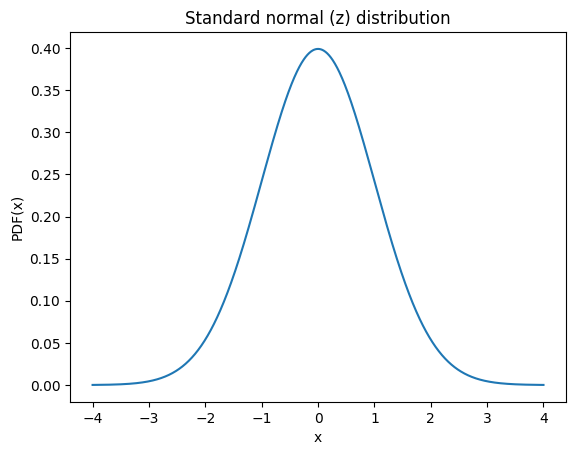

In [4]:
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt

# Standard normal (z) distribution
x = []
pdf_z = []
for i in np.linspace(-4, 4, 1000):
    x.append(i)
    pdf_z.append(norm.pdf(i))

fig, ax = plt.subplots()
ax.set_xlabel("x")
ax.set_ylabel("PDF(x)")
ax.set_title("Standard normal (z) distribution")
ax.plot(x, pdf_z)
plt.show()

In [5]:
def get_bootstrap_dist(df_sample, sample_col, resample_rate=5000):
    """
    Computes a boostrap distribution from a column in a dataframe

    Args:
      df_sample (Dataframe): pandas dataframe which has a numeric column named sample_col
      sample_col (str): name of the column in df_sample to calculate the bootstrap from
      resample_rate (int): number of resamples (with replacement) generated to build bootstrap distribution
    """
    boot_distrib = []
    for i in range(resample_rate):
        boot_distrib.append(
            # cacluate point estimate
            np.mean(
                # resample
                df_sample.sample(frac=1, replace=True)[sample_col]
            )
        )

    return(boot_distrib)

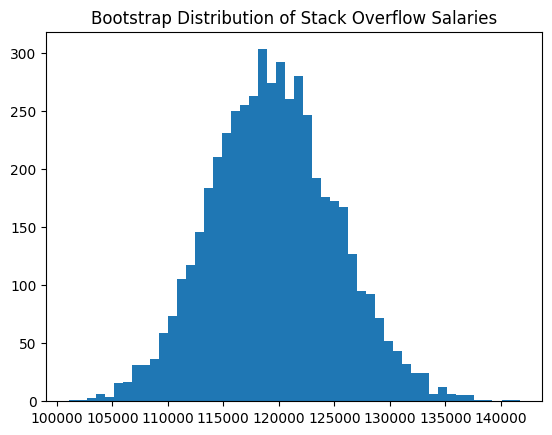

In [6]:
so_boot_distrib = get_bootstrap_dist(stack_overflow, "converted_comp")

# visualize boostrap dist
fig, ax = plt.subplots()
ax.hist(so_boot_distrib, bins=50)
ax.set_title("Bootstrap Distribution of Stack Overflow Salaries")
plt.show()

In [7]:
std_error = np.std(so_boot_distrib, ddof=1)
print(f"standard error of the boostrap distibution of SO salaries: {std_error}")

standard error of the boostrap distibution of SO salaries: 5652.667779045183


## z-scores

Before we can test hypotheses, we need to *standardize* our values.

$\Large\text{standardized value} = \frac{\text{value - mean}}{\text{standard deviation}}$

More generally:

$\Large\text{z} = \frac{\text{sample statistic - hypothetical parameter value}}{\text{standard error}}$

Intuitively, we can see that:
+ the closer the absolute value of this number is to zero, the **less likely** that the mean and the hypothesized value are significantly different.
+ the larger the absolute value of this number is, the **more likely** that the mean and the hypothsized value are significantly different.



In [8]:
# from our previous example
mean_comp_hyp = 110000  # our original hypothesized value
z_score_so_salaries = (mean_comp_samp - mean_comp_hyp) / std_error
print(f"z-score for SO salaries having hypothesized value of 110k: {z_score_so_salaries}")
print("What does this number suggest regarding our hypothesis?")

z-score for SO salaries having hypothesized value of 110k: 1.693840458337856
What does this number suggest regarding our hypothesis?


## Calculating the sample mean

The late_shipments dataset contains supply chain data on the delivery of medical supplies. Each row represents one delivery of a part. The late columns denotes whether or not the part was delivered late. A value of "Yes" means that the part was delivered late, and a value of "No" means the part was delivered on time.

We'll begin our analysis by calculating a point estimate (or sample statistic), namely the proportion of late shipments.

In [9]:
late_shipments = pd.read_feather('./data/late_shipments.feather')
print(f"shape of late shipments data BEFORE removing problematic row: {late_shipments.shape}\n")  # (1000, 27)
print(f"columns in the late shipments data: {late_shipments.columns}\n")

# drop the row with vendor_inco_term = DDU so results are same as shown in course
late_shipments = late_shipments.loc[late_shipments['vendor_inco_term'] != 'DDU', :]
print(f"shape of late shipments data after removing problematic row: {late_shipments.shape}\n")  # (999, 27)

are_late = late_shipments["late"].value_counts()
n_yes = are_late['Yes']
n_no = are_late['No']
print(are_late)

shape of late shipments data BEFORE removing problematic row: (1000, 27)

columns in the late shipments data: Index(['id', 'country', 'managed_by', 'fulfill_via', 'vendor_inco_term',
       'shipment_mode', 'late_delivery', 'late', 'product_group',
       'sub_classification', 'vendor', 'item_description',
       'molecule_test_type', 'brand', 'dosage', 'dosage_form',
       'unit_of_measure_per_pack', 'line_item_quantity', 'line_item_value',
       'pack_price', 'unit_price', 'manufacturing_site',
       'first_line_designation', 'weight_kilograms', 'freight_cost_usd',
       'freight_cost_groups', 'line_item_insurance_usd'],
      dtype='object')

shape of late shipments data after removing problematic row: (999, 27)

late
No     938
Yes     61
Name: count, dtype: int64


In [10]:
# calc the proportion of late shipments
late_prop_samp = (late_shipments["late"] == 'Yes').mean()

print(f"proportion of shipments that are late: {late_prop_samp}")

proportion of shipments that are late: 0.06106106106106106


## Calculating a z-score

Since variables have arbitrary ranges and units, we need to ***standardize*** them as mentioned earlier. For example, a hypothesis test using salaries data that gave different answers if the variables were in **Euros** instead of **US dollars** would be of little value. Standardization avoids this issue.

One standardized value of interest in a hypothesis test is called a **z-score**. To calculate it, we need three numbers: the sample statistic (point estimate), the hypothesized statistic, and the standard error of the statistic (estimated from the bootstrap distribution).

In [11]:
# create the bootstrap distribution for the proportion of late shipments
late_shipments["late_binary"] = late_shipments["late"] == "Yes"
late_shipments["late_binary"] = late_shipments["late_binary"].astype(int)
late_shipments_boot_distn = get_bootstrap_dist(late_shipments, "late_binary")
print(f"number samples in bootstrap distribution: {len(late_shipments_boot_distn)}")
print(f"first few samples of bootstrap distribution: {late_shipments_boot_distn[:5]}")

number samples in bootstrap distribution: 5000
first few samples of bootstrap distribution: [0.06506506506506507, 0.057057057057057055, 0.05905905905905906, 0.06106106106106106, 0.06706706706706707]


In [12]:
# hypothesize that the proportion is 6%
late_prop_hyp = 0.06

# calc standard error
std_error = np.std(late_shipments_boot_distn)

# calc z-score of late_prop_samp
z_score = (late_prop_samp - late_prop_hyp) / std_error

print(f"std error: {std_error} | z-score: {z_score}")  # 0.1335510751060483 listed on platform, pretty close

std error: 0.00755292899649638 | z-score: 0.14048338883541225


## p-values

$H_0:$ The proportion of data scientists starting programming as children is 35%  
$H_A:$ The proportion of data scientists starting programming as children is greater than 35% (right tail test)

In [13]:
stack_overflow["age_1st_cut_binary"] = stack_overflow["age_first_code_cut"] == "child"
stack_overflow["age_1st_cut_binary"] = stack_overflow["age_1st_cut_binary"].astype(int)
# create bootstrap dist of age_first_code_cut and visualize
first_code_boot_distn = get_bootstrap_dist(stack_overflow, "age_1st_cut_binary")

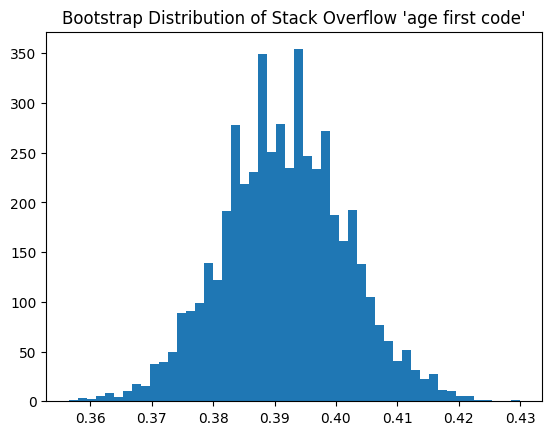

In [14]:
# visualize bootstrap distribution
fig, ax = plt.subplots()
ax.hist(first_code_boot_distn, bins=50)
ax.set_title("Bootstrap Distribution of Stack Overflow 'age first code'")
plt.show()

In [15]:
# calc z-score - start with the mean
prop_child_samp = (stack_overflow['age_first_code_cut'] == "child").mean() 
# hypothesized value
prop_child_hyp = 0.35
std_error = np.std(first_code_boot_distn, ddof=1)
z_score = (prop_child_samp - prop_child_hyp) / std_error
print(f"sample mean: {prop_child_samp} | std error: {std_error} | z-score: {z_score}")

sample mean: 0.39141972578505085 | std error: 0.010044268944254373 | z-score: 4.123717317301049


## Late shipments

In [16]:
# calc p-value for prior example
late_prop_hyp = 0.060

# Calculate the z-score of late_prop_samp
z_score = (late_prop_samp - late_prop_hyp) / std_error

# Calculate the p-value
p_value = 1 - norm.cdf(z_score, loc=0, scale=1)
                 
# Print the p-value
print(p_value) 

0.45793460605870406


## Statistical significance

+ p-values quantify evidence for the null hypothesis
+ Large p-value → fail to reject null hypothesis
+ Small p-value → reject null hypothesis
+ Where is the cutoff point? → **significance level** ($\alpha$), theshold point for "*beyond a reasonable doubt*"
+ Most common value for $\alpha$ is `0.05`, but `0.1`, `0.2` and `0.01` are not uncommon
+ If $p \leq \alpha, \text{reject } H_0 \text{, else fail to reject } H_0$
+ $\alpha$ needs to be set **prior** to conducting the hypothesis test
+ Define ***confidence interval*** as $1 - \alpha$

### Example

$H_0$: Proportion of coders starting as children = 0.35  
$H_A$: Proportion of coders starting as children > 0.35  

In [17]:
alpha = 0.05
prop_child_samp = (stack_overflow['age_first_code_cut'] == "child").mean()
prop_child_hyp = 0.35
std_error = np.std(first_code_boot_distn, ddof=1)
z_score = (prop_child_samp - prop_child_hyp) / std_error
p_value = 1 - norm.cdf(z_score, loc=0, scale=1)

print(f"Testing sample mean: {prop_child_samp} vs. hyp. mean: {prop_child_hyp}")
print(f"std error: {std_error} | z-score: {z_score} | p_value: {p_value}")

if p_value <= alpha:
    print(f"reject H0 because p_value of {p_value} is <= alpha of {alpha}")
else:
    print(f"accept H0 because p_value of {p_value} is > alpha of {alpha}")
   

Testing sample mean: 0.39141972578505085 vs. hyp. mean: 0.35
std error: 0.010044268944254373 | z-score: 4.123717317301049 | p_value: 1.864031944465161e-05
reject H0 because p_value of 1.864031944465161e-05 is <= alpha of 0.05


In [18]:
lower = np.quantile(first_code_boot_distn, 0.025)
upper = np.quantile(first_code_boot_distn, 0.975)
print(f"{round(100*(1-alpha))}% confidence interval: {(lower, upper)}")

95% confidence interval: (0.37195931003980537, 0.41220698805838124)


## Types of errors (confusion matrix)

<img src="./graphics/types_of_errors.png">

## Performing t-tests

The **t-statistic** is a value used to determine if there is a significant **difference between the means of two groups**, especially when the **sample size is small** or the **population standard deviation is unknown**. It is calculated as the ratio of the difference between an estimated value and a known value to the **standard error** of the estimate.

### Example: Compensation between members of group

*Are users who first programmed as a child compensated higher than those that started as adults?*

$H_0$ : The mean compensation (in USD) is the same for those that coded first as a child and those that coded first as an adult.

$H_0$ : $\mu_{\text{child}} = \mu_{\text{adult}}$&nbsp;&nbsp;&nbsp;&nbsp;or  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$\mu_{\text{child}} - \mu_{\text{adult}} = 0$

$H_A$ : The mean compensation (in USD) is **greater** for those that coded first as a child and those that coded first as an adult.

$H_A$ : $\mu_{\text{child}} > \mu_{\text{adult}}$&nbsp;&nbsp;&nbsp;&nbsp;or  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$\mu_{\text{child}} - \mu_{\text{adult}} > 0$

#### Notation

$\mu$ = population mean  
$\bar{x}$ = sample mean

In [19]:
# calculate groupwise summary stats
code_means = stack_overflow.groupby('age_first_code_cut')['converted_comp'].mean()
mean_child = code_means['child']
mean_adult = code_means['adult']
print(f"compensation for 1st code child:  {mean_child}")
print(f"compensation for 1st code adults: {mean_adult}")

compensation for 1st code child:  132419.5706214689
compensation for 1st code adults: 111313.31104651163


### Is this difference significant or can it be explained by sampling variability?

test statistic = $(\bar{x}_{\text{child}} - \bar{x}_{\text{adult}})$

### t-statistic

$$
\begin{align}
\Large\text{t} & = \frac{\text{difference in sample stats - difference in population parameters}}{\text{standard error}} \\[2em]
               & = \frac{(\bar{x}_{\text{child}} - \bar{x}_{\text{adult}}) - (\mu_{\text{child}} - \mu_{\text{adult}})}{\text{standard error}} \\[2em]
               & = \frac{(\bar{x}_{\text{child}} - \bar{x}_{\text{adult}}) - (\mu_{\text{child}} - \mu_{\text{adult}})}{SE(\bar{x}_{\text{child}} - \bar{x}_{\text{adult}})}
\end{align}
$$

### Standard error

The **standard error** is computed differently depending on the test, but for testing the difference between two means from populations of unequal variance, this is called **Welch's t-test** and the $SE$ is the denominatorof the following statistic:

$$
\begin{align}
\Large t = \dfrac{(\bar{x}_{\text{child}} - \bar{x}_{\text{adult}})}{\sqrt{\dfrac{s_{\text{child}}^2}{n_{\text{child}}} + \dfrac{s_{\text{adult}}^2}{n_{\text{adult}}}}}
\end{align}
$$


## Late shipments

### From t to p

In order to make decision about weights relationship to being late, we need to transform the test statistic with a cumulative distribution function to get a p-value.

#### Hypotheses:

$H_0$: The mean weight of shipments that weren't late is the same as the mean weight of shipments that were late.

$H_A$: The mean weight of shipments that weren't late is less than the mean weight of shipments that were late.

In [20]:
# weight_kilograms
late_wgt_mean = late_shipments.groupby("late")["weight_kilograms"].mean()
xbar_no = late_wgt_mean["No"]
xbar_yes = late_wgt_mean["Yes"]
late_wgt_std = late_shipments.groupby("late")["weight_kilograms"].std()
s_no = late_wgt_std["No"]
s_yes = late_wgt_std["Yes"]
print(late_wgt_mean)
print(late_wgt_std)

late
No     1899.751599
Yes    2715.672131
Name: weight_kilograms, dtype: float64
late
No     3155.149712
Yes    2544.688211
Name: weight_kilograms, dtype: float64


In [21]:
numerator = xbar_no - xbar_yes
denominator = np.sqrt(s_no ** 2 / n_no + s_yes ** 2 / n_yes)
t_stat = numerator / denominator
print(t_stat)

-2.3877370854420734


In [22]:
from scipy.stats import t

alpha = 0.05

# Calculate the degrees of freedom
degrees_of_freedom = n_yes + n_no - 2

# Calculate the p-value from the test stat
p_value = t.cdf(t_stat, df=degrees_of_freedom)

# Print the p_value
print(p_value)
print(f"Since p value of {p_value} is < alpha of {alpha}, reject the null hypothsis in favor of the alternative.")

0.008568932767510593
Since p value of 0.008568932767510593 is < alpha of 0.05, reject the null hypothsis in favor of the alternative.


## Paired t-tests

### Research question: Was the percentage of Republican candidate voters lower in 2008 than 2012?

$\Large H_0$ : $\Large \mu_{\text{2008}} - \mu_{\text{2012}} = 0$  
$\Large H_A$ : $\Large \mu_{\text{2008}} - \mu_{\text{2012}} < 0$

+ Set α = 0.05 significance level.
+ Data is **paired** → each voter percentage refers to the same county (not independent)
+ Want to capture voting patterns in model

**Reference:**  
https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/VOQCHQ

In [23]:
alpha = 0.05

df_rep_votes = pd.read_feather("./data/repub_votes_potus_08_12.feather")
df_rep_votes.head()

,state,county,repub_percent_08,repub_percent_12
0,Alabama,Hale,38.957877,37.139882
1,Arkansas,Nevada,56.726272,58.983452
2,California,Lake,38.896719,39.331367
3,California,Ventura,42.923190,45.250693
4,Colorado,Lincoln,74.522569,73.764757


<Axes: >

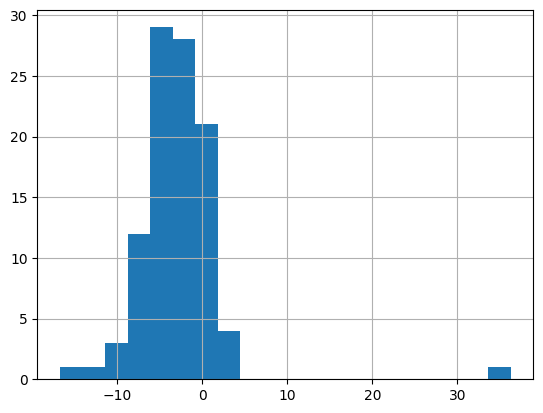

In [24]:
sample_data = df_rep_votes 
sample_data['diff'] = sample_data['repub_percent_08'] - sample_data['repub_percent_12']

sample_data['diff'].hist(bins=20) 

In [25]:
 xbar_diff = sample_data['diff'].mean()
print(f"mean of diff: {xbar_diff}")

mean of diff: -2.877109041242944


## Revised hypotheses

$\Large H_0$ : $\Large \mu_{\text{diff}} = 0$  
$\Large H_A$ : $\Large \mu_{\text{diff}} < 0$  

### Revised test statistic for paired samples:

$$
\begin{align}
\Large t = \dfrac{(\bar{x}_{\text{diff}} - \mu_{\text{diff}})}{\sqrt{\dfrac{s_{\text{diff}}^2}{n_{\text{diff}}}}} \\[1em]
\Large df = n_{\text{diff}} - 1
\end{align}
$$

In [26]:
n_diff = len(sample_data)
s_diff = sample_data['diff'].std()
print(f"n_diff: {n_diff} | s_diff: {s_diff}")

n_diff: 100 | s_diff: 5.136737887231852


In [27]:
t_stat = (xbar_diff-0) / np.sqrt(s_diff**2/n_diff)
degrees_of_freedom = n_diff - 1
p_value = t.cdf(t_stat, df=degrees_of_freedom)
print(f"t_stat: {t_stat} | degrees_of_freedom: {degrees_of_freedom} | p_value: {p_value}")
print(f"Since p value of {p_value} is < alpha of {alpha}, reject the null hypothsis in favor of the alternative.")

t_stat: -5.601043121928489 | degrees_of_freedom: 99 | p_value: 9.572537285272411e-08
Since p value of 9.572537285272411e-08 is < alpha of 0.05, reject the null hypothsis in favor of the alternative.


In [28]:
# easier way...
import pingouin

pingouin.ttest(
    x=sample_data['diff'],
    y=0,
    alternative="less"  # left tail
)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-5.601043,99,less,9.572537e-08,"[-inf, -2.02]",0.560104,1.323e+05,0.999955


In [29]:
# paired t-test - results in first 4 col's are the same
pingouin.ttest(
    x=sample_data['repub_percent_08'],
    y=sample_data['repub_percent_12'],
    paired=True,
    alternative="less"  # left tail
)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-5.601043,99,less,9.572537e-08,"[-inf, -2.02]",0.217364,1.323e+05,0.696338


In [30]:
pingouin.ttest(
    x=sample_data['repub_percent_08'],
    y=sample_data['repub_percent_12'],
    paired=False,  # notice how p-value increased and power decreased
    alternative="less"
)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-1.536997,198,less,0.062945,"[-inf, 0.22]",0.217364,0.927,0.454972


## ANOVA

Analysis of Variance (ANOVA) is used when we need compare the differences between more than 2 groups. For example, the *job satisfaction* variable (`job_sat`) in the **StackOverflow** data has 5 levels as shown below. Say that we want to know:

***Is mean annual compensation different for different levels of job satisfaction?***

A boxplot is well-suited for visualizing this type of data. The `Very satisfied` category looks slightly higher, but we need a hypothesis test to determine if this is a **significant** difference.

### ANOVA steps

+ Set a significance level: $\alpha$
+ 

In [31]:
stack_overflow['job_sat'].value_counts() 

job_sat
Very satisfied           879
Slightly satisfied       680
Slightly dissatisfied    342
Neither                  201
Very dissatisfied        159
Name: count, dtype: int64

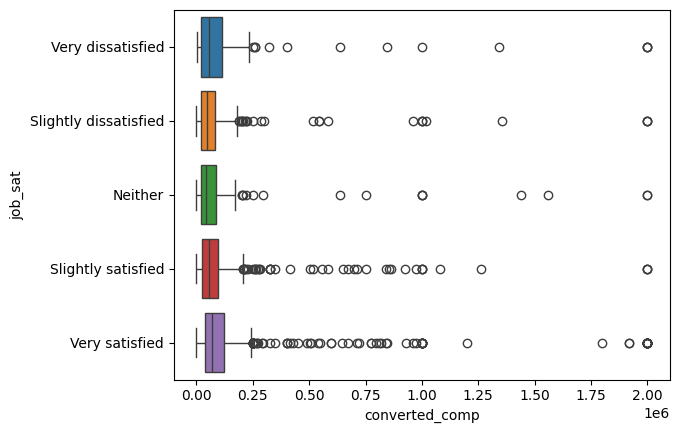

In [32]:
import seaborn as sns
sns.boxplot(x="converted_comp",
            y="job_sat",
            data=stack_overflow,
            hue="job_sat")
plt.show()

In [33]:
alpha = 0.2  # larger than typically set in most situations, but used here for illustration purposes

pingouin.anova(data=stack_overflow,
               dv="converted_comp",  # dependent variable: assuming that compenstation depends on job satisfaction
               between="job_sat")    # groups which we are making comparisons between

,Source,ddof1,ddof2,F,p-unc,np2
0,job_sat,4,2256,4.480485,0.001315,0.007882


+ $(p = 0.001315) < (\alpha = 0.2)$
+ At least two categories have *significantly different* compensation
    + ...but we don't know which two categories these are
 
### To identifying which categories are different, we need to run

<img src="./graphics/anova_pairwise_tests.png">

### We can us `pingouin` to run all these tests in one go!

In [34]:
pingouin.pairwise_tests(data=stack_overflow,
                        dv="converted_comp",
                        between="job_sat",
                        padjust="none")

,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,BF10,hedges
0,job_sat,Very dissatisfied,Slightly dissatisfied,False,True,1.129951,247.570187,two-sided,0.259590,0.197,0.119131
1,job_sat,Very dissatisfied,Neither,False,True,0.545948,321.165726,two-sided,0.585481,0.135,0.058537
2,job_sat,Very dissatisfied,Slightly satisfied,False,True,1.243665,187.153329,two-sided,0.215179,0.208,0.145624
3,job_sat,Very dissatisfied,Very satisfied,False,True,-0.747379,221.666205,two-sided,0.455627,0.126,-0.063479
4,job_sat,Slightly dissatisfied,Neither,False,True,-0.602209,367.730081,two-sided,0.547406,0.118,-0.055707
5,job_sat,Slightly dissatisfied,Slightly satisfied,False,True,0.038264,569.926329,two-sided,0.969491,0.074,0.002719
6,job_sat,Slightly dissatisfied,Very satisfied,False,True,-3.076222,821.303063,two-sided,0.002166,7.43,-0.173247
7,job_sat,Neither,Slightly satisfied,False,True,0.700752,258.204546,two-sided,0.484088,0.114,0.068513
8,job_sat,Neither,Very satisfied,False,True,-1.662901,328.326639,two-sided,0.097286,0.337,-0.120115
9,job_sat,Slightly satisfied,Very satisfied,False,True,-4.009935,1478.622799,two-sided,0.000064,158.564,-0.192931


### Three of these pairs have a p-value below our significance level

| A                    | B             | p-value |
|----------------------|---------------|---------|
| Slightly dissatisfied| Very satisfied| 0.002166|
|               Neither| Very satisfied| 0.097286|
|    Slightly satisfied| Very satisfied| 0.000064|

## As the number of groups increases

+ the number of pairs increases quadratically
+ the probability increases rapidly that you find at least 1 significant result which is due to chance
  + in other words, finding a result that you think is significant but is actually not.

### Number of pairs

As the number of groups increases, the number of pairs increases as the combination of *n choose 2* or:

$\Large{}_{n}C_{k} = \dfrac{n!}{k!(n-k)!} = {}_{n}C_{2} = \dfrac{n!}{2(n-2)!} = \dfrac{1}{2}n(n-1)$

which is quadratic.

### Finding a significant result that isn't really significant

In our example, each of the pairwise tests listed above has a 0.2 probability of finding a significant result. As the number of tests increases, the probability of finding at least one "significant" result can be modeled as a series of *Bernoulli trials*:

$\Large P(X = k) = ({}_{n}C_{k})p^{k}(1 - p)^{n-k}$

where $p$ is the probability of "success" (0.2 in our case), $k$ is the number of groupings (2 in our case) and $n$ is the number of trials (*tests* in our case). For our example, these two ideas can be visualized as follows:

<img src="./graphics/motive_for_bonferronii_correction.png">

### Bonferroni correction

The Bonferroni correction was designed to **increase** the **p-value** to reduce the chance of getting a false positive when running a large number of tests. This correction can be calculated by `pingouin`.  When we apply this correction, only 2 of the pairs shows true signicance per the **p-corr** (*p corrected*) column.

In [35]:
pingouin.pairwise_tests(data=stack_overflow,
                        dv="converted_comp",
                        between="job_sat",
                        padjust="bonf")

,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,job_sat,Very dissatisfied,Slightly dissatisfied,False,True,1.129951,247.570187,two-sided,0.259590,1.000000,bonf,0.197,0.119131
1,job_sat,Very dissatisfied,Neither,False,True,0.545948,321.165726,two-sided,0.585481,1.000000,bonf,0.135,0.058537
2,job_sat,Very dissatisfied,Slightly satisfied,False,True,1.243665,187.153329,two-sided,0.215179,1.000000,bonf,0.208,0.145624
3,job_sat,Very dissatisfied,Very satisfied,False,True,-0.747379,221.666205,two-sided,0.455627,1.000000,bonf,0.126,-0.063479
4,job_sat,Slightly dissatisfied,Neither,False,True,-0.602209,367.730081,two-sided,0.547406,1.000000,bonf,0.118,-0.055707
5,job_sat,Slightly dissatisfied,Slightly satisfied,False,True,0.038264,569.926329,two-sided,0.969491,1.000000,bonf,0.074,0.002719
6,job_sat,Slightly dissatisfied,Very satisfied,False,True,-3.076222,821.303063,two-sided,0.002166,0.021659,bonf,7.43,-0.173247
7,job_sat,Neither,Slightly satisfied,False,True,0.700752,258.204546,two-sided,0.484088,1.000000,bonf,0.114,0.068513
8,job_sat,Neither,Very satisfied,False,True,-1.662901,328.326639,two-sided,0.097286,0.972864,bonf,0.337,-0.120115
9,job_sat,Slightly satisfied,Very satisfied,False,True,-4.009935,1478.622799,two-sided,0.000064,0.000638,bonf,158.564,-0.192931


## Visualizing many categories

Many datasets contain more than 2 categories. Before we get to conducting tests on many categories, it's often helpful to perform exploratory data analysis (EDA), calculating summary statistics for each group and visualizing the distributions of the numeric variable for each category using box plots.

Here, we'll return to the late shipments data, and how the price of each package (pack_price) varies between the three shipment modes (shipment_mode): "Air", "Air Charter", and "Ocean".

In [36]:
# Calculate the mean pack_price for each shipment_mode
xbar_pack_by_mode = late_shipments.groupby("shipment_mode")["pack_price"].mean()

# Calculate the standard deviation of the pack_price for each shipment_mode
s_pack_by_mode = late_shipments.groupby("shipment_mode")['pack_price'].std()

# Print the grouped means
print(xbar_pack_by_mode, "\n")
print(s_pack_by_mode)

shipment_mode
Air            39.705116
Air Charter     4.226667
Ocean           6.432273
Name: pack_price, dtype: float64 

shipment_mode
Air            48.959427
Air Charter     0.992969
Ocean           5.303047
Name: pack_price, dtype: float64


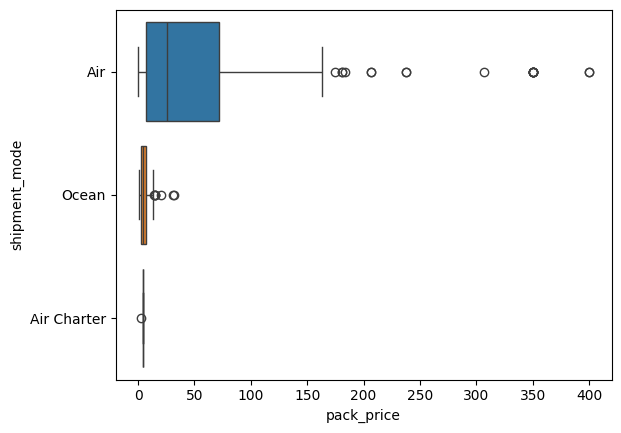

In [37]:
# visualize with boxplot of shipment_mode vs. pack_price
sns.boxplot(x="pack_price",
            y="shipment_mode",
            data=late_shipments,
            hue="shipment_mode")
plt.show()

In [38]:
# ANOVA for pack_price across shipment_mode
anova_results = pingouin.anova(
    data=late_shipments,
    dv="pack_price",
    between="shipment_mode"
)

# Print anova_results
print(anova_results)
print("Reject H0 that pack price is the same across shipping modes")

          Source  ddof1  ddof2          F         p-unc       np2
0  shipment_mode      2    996  21.831329  5.256696e-10  0.041997
Reject H0 that pack price is the same across shipping modes


In [39]:
# pairwise t-test on pack price, grouped by shipment mode
pairwise_results = pingouin.pairwise_tests(
    data=late_shipments,
    dv="pack_price",
    between="shipment_mode"
)

# Print pairwise_results
print(pairwise_results)

        Contrast            A            B  Paired  Parametric          T  \
0  shipment_mode          Air  Air Charter   False        True  21.153462   
1  shipment_mode          Air        Ocean   False        True  19.312655   
2  shipment_mode  Air Charter        Ocean   False        True  -3.170654   

          dof alternative         p-unc       BF10    hedges  
0  601.222302   two-sided  1.160890e-74  3.878e+76  0.726051  
1  986.136131   two-sided  9.786259e-71   7.99e+66  0.710612  
2   35.615026   two-sided  3.123012e-03     15.277 -0.423775  


In [40]:
# pairwise t-tests modified to use Bonferroni p-value adjustment
pairwise_results = pingouin.pairwise_tests(data=late_shipments, 
                                           dv="pack_price",
                                           between="shipment_mode",
                                           padjust="bonf")

# Print pairwise_results
print(pairwise_results)

        Contrast            A            B  Paired  Parametric          T  \
0  shipment_mode          Air  Air Charter   False        True  21.153462   
1  shipment_mode          Air        Ocean   False        True  19.312655   
2  shipment_mode  Air Charter        Ocean   False        True  -3.170654   

          dof alternative         p-unc        p-corr p-adjust       BF10  \
0  601.222302   two-sided  1.160890e-74  3.482670e-74     bonf  3.878e+76   
1  986.136131   two-sided  9.786259e-71  2.935878e-70     bonf   7.99e+66   
2   35.615026   two-sided  3.123012e-03  9.369037e-03     bonf     15.277   

     hedges  
0  0.726051  
1  0.710612  
2 -0.423775  


## One-sample proportion tests

0. Set significance level ($\alpha$)
1. Estimate standard error of sample statistic from bootstrap distribution
2. Compute a standardized test statistic
3. Calculate a p-value
4. Decide which hypothesis made most sense

## StackOverflow example

 $H_0$ : Proportion of Stack Overflow users under thirty = 0.5  
 $H_A$ : Proportion of Stack Overflow users under thirty ≠ 0.5  (**2-tail test**)

In [41]:
alpha = 0.01
stack_overflow['age_cat'].value_counts(normalize=True)

age_cat
Under 30       0.535604
At least 30    0.464396
Name: proportion, dtype: float64

In [42]:
# cal z score
p_hat = (stack_overflow['age_cat'] == 'Under 30').mean()
p_0 = 0.50  # under H0
n = len(stack_overflow) 

numerator = p_hat - p_0
denominator = np.sqrt(p_0 * (1 - p_0) / n)
z_score = numerator / denominator
print(z_score)

3.385911440783663


In [43]:
p_value = norm.cdf(-z_score) +  1 - norm.cdf(z_score)
# p_value = 2 * (1 - norm.cdf(z_score)) give same results, but is less explicit
print(f"The p_value is {p_value} which is < alpha of {alpha}, so we reject H0")

The p_value is 0.0007094227368100725 which is < alpha of 0.01, so we reject H0


## Late shipments example

$H_0$ : Late shipments are 6% of all shipments  
$H_A$ : Late shipments are greater than 6%  (**right tail test**)

In [44]:
# Hypothesize that the proportion of late shipments is 6%
p_0 = 0.06

# Calculate the sample proportion of late shipments
p_hat = (late_shipments["late"] == "Yes").mean()

# Calculate the sample size
n = len(late_shipments)

# Calculate the numerator and denominator of the test statistic
numerator = p_hat - p_0
denominator = np.sqrt((p_0 * (1 - p_0)) / n)

# Calculate the test statistic
z_score = numerator / denominator

# Calculate the p-value from the z-score
p_value = 1 - norm.cdf(z_score)

print(f"p_hat = {p_hat}, n = {n}")
print(f"z_score = {z_score} , p_value = {p_value}")

p_hat = 0.06106106106106106, n = 999
z_score = 0.14121589054828845 , p_value = 0.44384969651518114


## Two-sample proportion tests

<img src="./graphics/devore_p376.png">

### Example comparing two proportions
 
 $H_0$ : Proportion of hobbyist users is the same for those under thirty as those at least thirty  
 $H_0$ : $p_{\ge30} − p_{<30} = 0$  
 
 $H_A$ : Proportion of hobbyist users is different for those under thirty to those at least thirty  
 $H_A$ : $p_{\ge30} − p_{<30} \neq 0$

 Significance: $\alpha = 0.05$

In [45]:
alpha = 0.05

p_hats = stack_overflow.groupby("age_cat")["hobbyist"].value_counts(normalize=True)  # set normalize param to get proportions
n_m = stack_overflow.groupby("age_cat")["hobbyist"].count()
print(p_hats, "\n")
print(n_m)

age_cat      hobbyist
At least 30  Yes         0.773333
             No          0.226667
Under 30     Yes         0.843105
             No          0.156895
Name: proportion, dtype: float64 

age_cat
At least 30    1050
Under 30       1211
Name: hobbyist, dtype: int64


In [46]:
# assign quantities for z-score calculation - using pandas multi-indexing is helpful here
p_hat_geq_30 = p_hats[("At least 30", "Yes")]
p_hat_lt_30 = p_hats[("Under 30", "Yes")]
n_geq_30 = n_m["At least 30"]
n_lt_30 = n_m["Under 30"]
p_hat = ((n_geq_30 * p_hat_geq_30)/(n_geq_30 + n_lt_30)) + ((n_lt_30 * p_hat_lt_30)/(n_geq_30 + n_lt_30))

print(p_hat_geq_30, p_hat_lt_30, p_hat)
print(n_geq_30, n_lt_30)

0.7733333333333333 0.8431048720066061 0.810703228659885
1050 1211


In [47]:
std_error = np.sqrt((p_hat * (1 - p_hat)) * ((1 / n_geq_30) + (1 / n_lt_30)))
z_score = (p_hat_geq_30 - p_hat_lt_30) / std_error
p_value = 2 * (norm.cdf(z_score))  # 2-tail, symmetric
print(z_score, p_value)

-4.223691463320559 2.403330142685068e-05


## Doing the same thing using statsmodels

Doesn't save a ton of work, but good know...

In [48]:
from statsmodels.stats.proportion import proportions_ztest
n_m = stack_overflow.groupby("age_cat")["hobbyist"].value_counts()

n_hobbyists = np.array([n_m[("At least 30", "Yes")], n_m[("Under 30", "Yes")]])
n_obs = np.array([n_geq_30, n_lt_30])

print(n_hobbyists)
print(n_obs)
# two-sided is the default, but specify for clarity
z_score, p_value = proportions_ztest(count=n_hobbyists, nobs=n_obs, alternative="two-sided")
print(z_score, p_value)  # same values as above
print(f"p_value of {p_value} is < alpha of {alpha}, therefore we reject the null hypothesis in favor of the alternative")

[ 812 1021]
[1050 1211]
-4.223691463320559 2.403330142685068e-05
p_value of 2.403330142685068e-05 is < alpha of 0.05, therefore we reject the null hypothesis in favor of the alternative


## Chi-square test of independence

These extend testing between proportions to more than 2 groups.

**Statistical independence** - proportion of successes in the response variable is the same across all categories of the explanatory variable

In [49]:
# chi-squared test for independence using pingouin

expected, observed, stats = pingouin.chi2_independence(data=stack_overflow,
                                                       x='hobbyist',
                                                       y='age_cat',
                                                       correction=False)  # apply Yates continuity correction for small sample size and dof=1
                                                                          # don't need here because each group has > 100 samples
print(stats)

                 test    lambda       chi2  dof      pval    cramer     power
0             pearson  1.000000  17.839570  1.0  0.000024  0.088826  0.988205
1        cressie-read  0.666667  17.818114  1.0  0.000024  0.088773  0.988126
2      log-likelihood  0.000000  17.802653  1.0  0.000025  0.088734  0.988069
3       freeman-tukey -0.500000  17.815060  1.0  0.000024  0.088765  0.988115
4  mod-log-likelihood -1.000000  17.848099  1.0  0.000024  0.088848  0.988236
5              neyman -2.000000  17.976656  1.0  0.000022  0.089167  0.988694


(pearson) $\chi^2 = 17.839570 = (\text{z-score})^2 = (-4.223691463320559)^2$ as shown above

### The `job_sat` categorical variable has 5 levels

+ Very satisfied
+ Slightly satisfied
+ Neither
+ Slightly dissatisfied
+ Very dissatisfied

This is a good variable to use in order to illustrate the Chi-squared tests for independence. Define the null and alternative hypotheses and signifcance level as follows:

$H_0$ : Age categories **are independent** of job satisfaction levels  
$H_A$ : Age categories **are NOT independent** of job satisfaction levels  
$\alpha = 0.1$

#### Specifics

+ In this example, `age_cat` will be considered the *response* variable and `job_sat`, the *explanatory* variable
+ Test statistic denoted $\chi^2$
  + This quantifies how far away the observed results are from the expected values ***if independence is true***.
+ A **proportional stacked bar plot** is a good way to visualize the data in the context of this type of analysis.
+ If $H_0$ is true, we would expect that the length of the age bars are about the same.
  + For this example, the bars look slightly different, but pretty similar in length.
  + A $\chi^2$ independence test is useful here to work this out.
  + DoF = (number of response categories - 1) x (number of explanatory categories - 1) = (2 - 1) x (5 - 1) = 4
    + This is why we see 4.0 in `dof` column of the test results below.
    + The p value (`pval` in the results below 0.23) is > $(\alpha = 0.1)$, so we conclude that age categories are ***independent*** of job satisfaction.
  + We don't usually need to worry about direction or tails with this type of test because the $\chi^2$ statistic is, well, **squared** so it is non-negative which means that these tests are always inherently ***right-tail*** tests.
  + However, Left-tailed chi-square tests are used in statistical forensics to detect if a fit is suspiciously good because the data was fabricated. Chi-square tests of variance can be two-tailed. These are ***niche*** uses, though.

job_sat                age_cat    
Very dissatisfied      Under 30       0.509434
                       At least 30    0.490566
Slightly dissatisfied  Under 30       0.532164
                       At least 30    0.467836
Neither                Under 30       0.567164
                       At least 30    0.432836
Slightly satisfied     Under 30       0.564706
                       At least 30    0.435294
Very satisfied         Under 30       0.511945
                       At least 30    0.488055
Name: proportion, dtype: float64 

age_cat                At least 30  Under 30
job_sat                                     
Very dissatisfied         0.490566  0.509434
Slightly dissatisfied     0.467836  0.532164
Neither                   0.432836  0.567164
Slightly satisfied        0.435294  0.564706
Very satisfied            0.488055  0.511945 



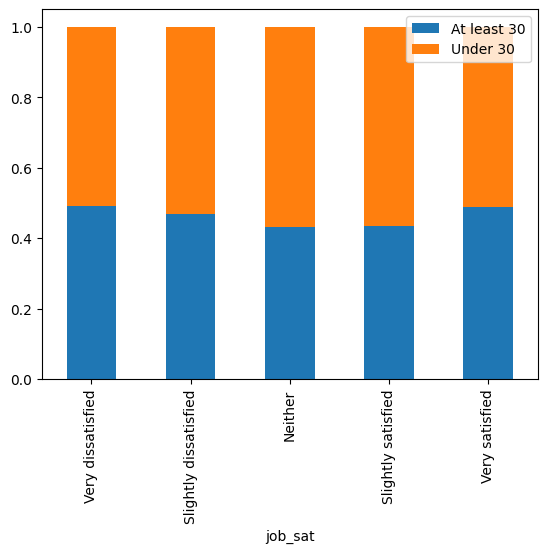

In [50]:
alpha = 0.1
# get the proportions in each (job_sat, age_cat) grouping
props = stack_overflow.groupby('job_sat', observed=False)['age_cat'].value_counts(normalize=True)
print(props, "\n")
wide_props = props.unstack()
print(wide_props, "\n")
ax = wide_props.plot(kind="bar", stacked=True)
plt.legend(loc='upper right')
plt.show()

In [51]:
# run chi-squared on the age_cat vs. job_sat
expected, observed, stats = pingouin.chi2_independence(data=stack_overflow, x="job_sat", y="age_cat") 
print(stats)

                 test    lambda      chi2  dof      pval    cramer     power
0             pearson  1.000000  5.552373  4.0  0.235164  0.049555  0.437417
1        cressie-read  0.666667  5.554106  4.0  0.235014  0.049563  0.437545
2      log-likelihood  0.000000  5.558529  4.0  0.234632  0.049583  0.437871
3       freeman-tukey -0.500000  5.562688  4.0  0.234274  0.049601  0.438178
4  mod-log-likelihood -1.000000  5.567570  4.0  0.233854  0.049623  0.438538
5              neyman -2.000000  5.579519  4.0  0.232828  0.049676  0.439419


### What if we swap the variables?

It may make more sense the think about `job_sat` as the response and `age_cat` as the expanatory variable. How does the analysis look if we view things from this perspective?

Looks like these bars of similar height as well, but we'll use a $\chi^2$ independence test to explore this more closely.

What we really are asking is: ***Are variables X and Y independent?*** and **NOT** *Is X independent from Y or vice versa?*

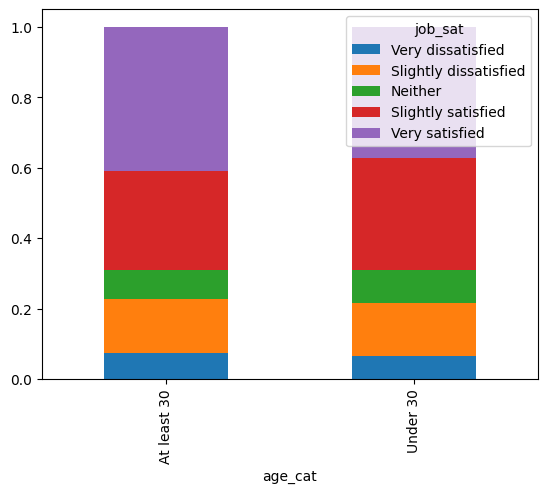

In [52]:
props = stack_overflow.groupby("age_cat", observed=False)["job_sat"].value_counts(normalize=True)
wide_props = props.unstack()
ax = wide_props.plot(kind="bar", stacked=True)
plt.show()

In [53]:
# run chi-squared with age_cat as explanatory and job_sat as response
expected, observed, stats = pingouin.chi2_independence(data=stack_overflow, x="age_cat", y="job_sat") 
print(stats[stats['test'] == 'pearson'])  # results are the same (which is what we should expect)

      test  lambda      chi2  dof      pval    cramer     power
0  pearson     1.0  5.552373  4.0  0.235164  0.049555  0.437417


## Trade deals example

Trade deals often use a form of business shorthand in order to specify the exact details of their contract. These are International Chamber of Commerce (ICC) international commercial terms, or incoterms for short.

The `late_shipments` dataset includes a `vendor_inco_term` that describes the incoterms that applied to a given shipment. The choices (levels) are:

+ EXW: "Ex works". The buyer pays for transportation of the goods.
+ CIP: "Carriage and insurance paid to". The seller pays for freight and insurance until the goods board a ship.
+ DDP: "Delivered duty paid". The seller pays for transportation of the goods until they reach a destination port.
+ FCA: "Free carrier". The seller pays for transportation of the goods.

We hypothesize that incoterms affect the freight costs. To evaluate this claim, we test the following hypotheses with a significance level of 0.01.

$H_0$: `vendor_inco_term` and `freight_cost_group` are independent.  
$H_A$: `vendor_inco_term` and `freight_cost_group` are associated.

In [54]:
print(late_shipments.shape)
late_shipments.columns

(999, 28)


Index(['id', 'country', 'managed_by', 'fulfill_via', 'vendor_inco_term',
       'shipment_mode', 'late_delivery', 'late', 'product_group',
       'sub_classification', 'vendor', 'item_description',
       'molecule_test_type', 'brand', 'dosage', 'dosage_form',
       'unit_of_measure_per_pack', 'line_item_quantity', 'line_item_value',
       'pack_price', 'unit_price', 'manufacturing_site',
       'first_line_designation', 'weight_kilograms', 'freight_cost_usd',
       'freight_cost_groups', 'line_item_insurance_usd', 'late_binary'],
      dtype='object')

vendor_inco_term  freight_cost_groups
CIP               reasonable             0.680000
                  expensive              0.320000
DDP               expensive              0.550000
                  reasonable             0.450000
EXW               expensive              0.583448
                  reasonable             0.416552
FCA               reasonable             0.663636
                  expensive              0.336364
Name: proportion, dtype: float64 

freight_cost_groups  expensive  reasonable
vendor_inco_term                          
CIP                   0.320000    0.680000
DDP                   0.550000    0.450000
EXW                   0.583448    0.416552
FCA                   0.336364    0.663636


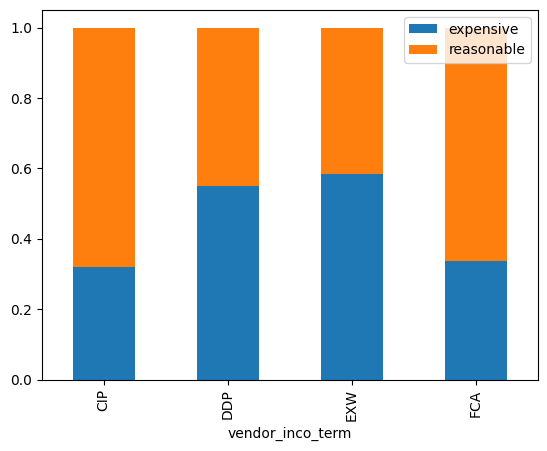

In [55]:
# Proportion of freight_cost_groups grouped by vendor_inco_term
props = late_shipments.groupby("vendor_inco_term")["freight_cost_groups"].value_counts(normalize=True)

# Print props
print(props, "\n")

# Convert props to wide format
wide_props = props.unstack()

# Print wide_props
print(wide_props)

# Proportional stacked bar plot of freight_cost_group vs. vendor_inco_term
wide_props.plot(kind="bar", stacked=True)
plt.legend(loc='upper right')
plt.show()

In [56]:
# Determine if freight_cost_group and vendor_inco_term are independent
expected, observed, stats = pingouin.chi2_independence(data=late_shipments, x="freight_cost_groups", y="vendor_inco_term")

# Print results
result = stats[stats['test'] == 'pearson']
print(type(result))
print(result)
p_value = result["pval"][0]
# print(p_value)
print(f"Reject H0 that vendor_inco_term and freight_cost_group are independent since {p_value} < 0.01")

<class 'pandas.core.frame.DataFrame'>
      test  lambda     chi2  dof          pval    cramer     power
0  pearson     1.0  33.6426  3.0  2.357026e-07  0.183511  0.999424
Reject H0 that vendor_inco_term and freight_cost_group are independent since 2.3570258196712344e-07 < 0.01


## Chi-square goodness of fit tests

### StackOverflow data: How do you feel when you discover that you've already visited the top resource?

$H_0$ : The sample matches the hypothesized distribution  
$H_A$ : The sample **does NOT** match the hypothesized distribution  
Set significance level to $\alpha = 0.01$

$\chi^2$ measures how far observed results are from expectations in each group

In [57]:
purple_link_counts = stack_overflow['purple_link'].value_counts()
print(purple_link_counts, "\n")  # print the Series
# purple_link_counts = purple_link_counts.rename_axis('purple_link')\  # index already set to this, so DRY
purple_link_counts = purple_link_counts.reset_index(name='n')  # turn the index into a column (drop=False by default)

print(purple_link_counts)

purple_link
Hello, old friend    1225
Indifferent           405
Amused                368
Annoyed               263
Name: count, dtype: int64 

         purple_link     n
0  Hello, old friend  1225
1        Indifferent   405
2             Amused   368
3            Annoyed   263


In [58]:
# declare the hypothesized distribution
hypothesized = pd.DataFrame({ 
    'purple_link': ['Hello, old friend', 'Indifferent', 'Amused', 'Annoyed'],  
    'prop': [1/2, 1/6, 1/6, 1/6]})

print(hypothesized)

         purple_link      prop
0  Hello, old friend  0.500000
1        Indifferent  0.166667
2             Amused  0.166667
3            Annoyed  0.166667


In [59]:
alpha = 0.01
# hypothesized counts by level
n_total = stack_overflow.shape[0]
hypothesized["n"] = hypothesized["prop"] * n_total
hypothesized

,purple_link,prop,n
0,"Hello, old friend",0.500000,1130.500000
1,Indifferent,0.166667,376.833333
2,Amused,0.166667,376.833333
3,Annoyed,0.166667,376.833333


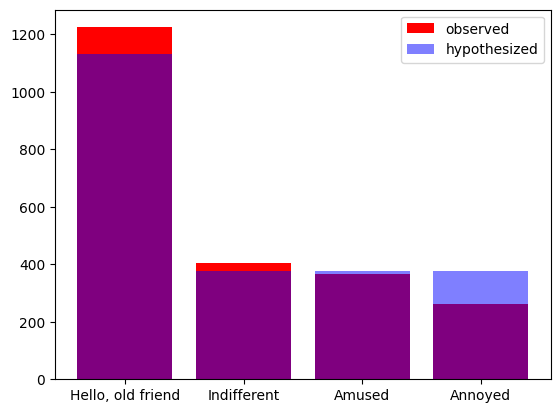

In [60]:
# compare the actual vs hypothesized counts
plt.bar(purple_link_counts['purple_link'], purple_link_counts['n'], color='red', label='observed')
plt.bar(hypothesized['purple_link'], hypothesized['n'], alpha=0.5, color='blue', label='hypothesized')
plt.legend()
plt.show()

The `Indifferent` and `Amused` levels appear to be modeled reasonably well with the hyposized distribution, but the other 2 levels (`Hello, old friend` and `Annoyed`) are not. We'll run a hypothesis test to see if the difference is statistically significant.

In [61]:
from scipy.stats import chisquare

chi_sqr_stat = chisquare(f_obs=purple_link_counts['n'], f_exp=hypothesized['n'])
print(chi_sqr_stat)
print(f"Reject H0 that distribution is the same as the hypothsized distribution since {p_value} < 0.01")

Power_divergenceResult(statistic=44.59840778416629, pvalue=1.1261810719413759e-09)
Reject H0 that distribution is the same as the hypothsized distribution since 2.3570258196712344e-07 < 0.01


## Visualizing goodness of fit

Before running such a chi-square goodness of fit test, it can be helpful to visually compare the distribution in the sample to the hypothesized distribution.

Recall the vendor `incoterms` in the `late_shipments` dataset. Let's hypothesize that the four values occur with these frequencies in the population of shipments.

+ CIP: 0.05
+ DDP: 0.1
+ EXW: 0.75
+ FCA: 0.1

### Test specifics

$H_0$ : The sample matches with the hypothesized distribution.

$H_A$ : The sample does not match with the hypothesized distribution.

To decide which hypothesis to choose, we'll set a significance level of 0.1.

In [62]:
incoterm_counts = late_shipments['vendor_inco_term'].value_counts()
incoterm_counts = incoterm_counts.reset_index('vendor_inco_term')
incoterm_counts.rename(columns={"count": "n"}, inplace=True)
# sort by vendor_inco_term to facilitate hyp testing
incoterm_counts.sort_values(by=['vendor_inco_term'], inplace=True)
incoterm_counts

,vendor_inco_term,n
3,CIP,56
2,DDP,100
0,EXW,732
1,FCA,111


In [63]:
# Find the number of rows in late_shipments
n_total = len(late_shipments)

hypothesized = pd.DataFrame({
    "vendor_inco_term": ["CIP", "DDP", "EXW", "FCA"],
    "prop": [0.05, 0.1, 0.75, 0.1]
})

# Create n column that is prop column * n_total
hypothesized['n'] = n_total * hypothesized['prop']

# Print the modified hypothesized DataFrame
print(hypothesized)

  vendor_inco_term  prop       n
0              CIP  0.05   49.95
1              DDP  0.10   99.90
2              EXW  0.75  749.25
3              FCA  0.10   99.90


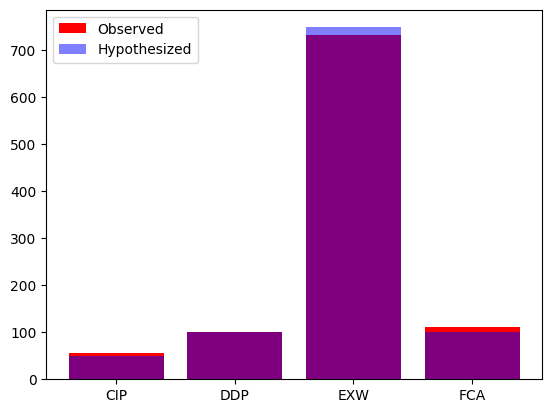

In [64]:
# Find the number of rows in late_shipments
n_total = incoterm_counts['n'].sum()

# Create n column that is prop column * n_total
hypothesized["n"] = hypothesized["prop"] * n_total

# red bar plot of n vs. vendor_inco_term for incoterm_counts
plt.bar(incoterm_counts['vendor_inco_term'], incoterm_counts['n'], color= 'red', label="Observed")
# blue bar plot for the hypothesized counts
plt.bar(hypothesized['vendor_inco_term'], hypothesized['n'], color='blue', alpha=0.5, label="Hypothesized")
plt.legend()
plt.show()

In [65]:
print(incoterm_counts, "\n")
print(hypothesized, "\n")
print(incoterm_counts['n'].sum(), hypothesized['n'].sum())

  vendor_inco_term    n
3              CIP   56
2              DDP  100
0              EXW  732
1              FCA  111 

  vendor_inco_term  prop       n
0              CIP  0.05   49.95
1              DDP  0.10   99.90
2              EXW  0.75  749.25
3              FCA  0.10   99.90 

999 999.0


In [66]:
# Perform a goodness of fit test on the incoterm counts n
gof_test = chisquare(f_obs=incoterm_counts['n'], f_exp=hypothesized['n'])

# Print gof_test results
print(gof_test)
print(f"Fail to reject H0 that distribution is the same as the hypothsized distribution since {p_value} > 0.1")

Power_divergenceResult(statistic=2.3633633633633613, pvalue=0.5004909543758687)
Fail to reject H0 that distribution is the same as the hypothsized distribution since 2.3570258196712344e-07 > 0.1


## Assumptions in hypothesis testing

### Testing sample size

In order to conduct a hypothesis test and be sure that the result is fair, a sample must meet three requirements:

1. it is a random sample of the population
2. the observations are independent, and
3. there are enough observations.

Of these, only the last condition is easily testable with code.

The minimum sample size depends on the type of hypothesis tests you want to perform. We'll now test some scenarios on the late_shipments dataset.

In [67]:
# Count the freight_cost_group values
counts = late_shipments["freight_cost_groups"].value_counts()

# Print the result
print(counts)

# Inspect whether the counts are big enough for 2-sample t-test
print((counts >= 30).all())

freight_cost_groups
expensive     531
reasonable    454
Name: count, dtype: int64
True


In [68]:
# Count the late values
counts =  late_shipments["late"].value_counts()

# Print the result
print(counts)

# Inspect whether the counts are big enough for a 1-sample proportion test
print((counts >= 10).all())

late
No     938
Yes     61
Name: count, dtype: int64
True


In [69]:
# Count the values of freight_cost_group grouped by vendor_inco_term
counts = late_shipments.groupby('vendor_inco_term')['freight_cost_groups'].value_counts()

# Print the result
print(counts)

# Inspect whether the counts are big enough for a chi-square independence test
print((counts >= 5).all())

vendor_inco_term  freight_cost_groups
CIP               reasonable              34
                  expensive               16
DDP               expensive               55
                  reasonable              45
EXW               expensive              423
                  reasonable             302
FCA               reasonable              73
                  expensive               37
Name: count, dtype: int64
True


In [70]:
# Count the shipment_mode values
counts = late_shipments['shipment_mode'].value_counts()

# Print the result
print(counts)

# Inspect whether the counts are big enough for an ANOVA test
print((counts >= 30).all())

shipment_mode
Air            905
Ocean           88
Air Charter      6
Name: count, dtype: int64
False


## Non-parametric tests

+ Non-parametric tests are a class of tests we can use when the assumptions described above are **not** met
+ Many non-parametric tests use **ranks** of the data
+ Non-parametric tests are more reliable than parametric tests for small sample sizes and when data ***isn't normally distributed***

###  Wilcoxon-signed rank test
+ Developed by Frank Wilcoxon in 1945
+ One of the first non-parametric procedures
+ Steps 1 & 2 - compute the absolute differences

In [71]:
from scipy.stats import rankdata

x = [1, 15, 3, 10, 6]
x_ranks_manual = np.array([1., 5., 2., 4., 3.])  # 1 = smallest, len(x) = 5 = largest
x_ranks_scipy = rankdata(x)
# check our intuition
print(np.array_equal(x_ranks_manual, x_ranks_scipy))

True


## References

1. Probability and Statistics for Engineering and the Sciences - Devore, 8th Edition